## Linear Regression with sklearn

Coefficients: [[2.93647151]]
Mean squared error: 1.0434333815695171
Intercept: [4.32235853]
R2 score: 0.7424452332071367


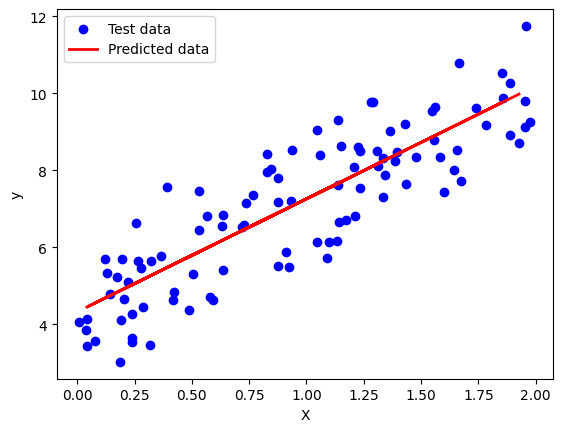

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from numba.parfors.parfor import maximize_fusion_inner
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f'Coefficients: {model.coef_}')
print(f'Mean squared error: {mean_squared_error(y_test, y_pred)}')
print(f'Intercept: {model.intercept_}')
print(f'R2 score: {r2_score(y_test, y_pred)}')

plt.scatter(X, y, color='blue', label='Test data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted data')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

## Non-linear Regression with sklearn

Mean squared error: 0.7294502941715063
R2 score: -0.7077554404706619


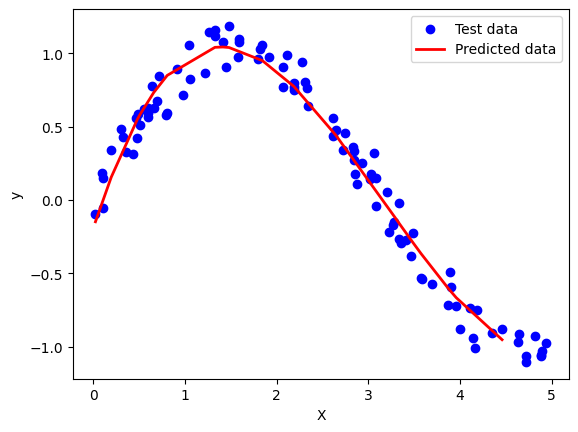

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

np.random.seed(0)
X = np.sort(5 * np.random.rand(100, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = make_pipeline(PolynomialFeatures(3), LinearRegression())
model.fit(X_train, y_train)

X_test = sorted(X_test)
y_pred = model.predict(X_test)

print(f'Mean squared error: {mean_squared_error(y_test, y_pred)}')
print(f'R2 score: {r2_score(y_test, y_pred)}')

plt.scatter(X, y, color='blue', label='Test data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted data')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

## Multiple Linear Regression with sklearn
### Example 1

In [10]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

np.random.seed(0)
X = np.random.rand(100, 3) # 3 features
y = X @ np.array([1.5, -2., 1.]) + np.random.randn(100) * 0.5

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(f'Coefficients: {model.coef_}')
print(f'Mean squared error: {mean_squared_error(y_test, y_pred)}')
print(f'Intercept: {model.intercept_}')
print(f'R2 score: {r2_score(y_test, y_pred)}')

Coefficients: [ 1.43437988 -2.11996089  1.04355848]
Mean squared error: 0.27411631226306016
Intercept: 0.008168506235464335
R2 score: 0.642068155161227


### Example 2 Binary Linear Regression 3D Plot

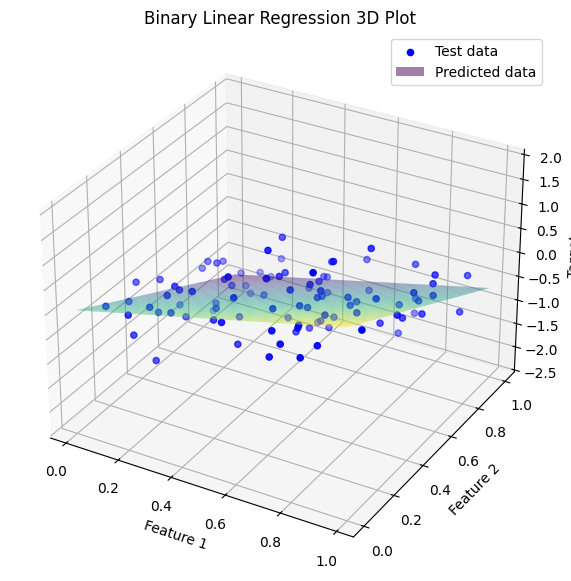

Coefficients: [ 1.28138828 -1.95184313]
Mean squared error: 1.8111273123295994
Intercept: 0.022467480297790388


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

np.random.seed(0)
X = np.random.rand(100, 2) # 2 features
y = X @ np.array([1.5, -2.]) + np.random.randn(100) * 0.5

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

x1 = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
x2 = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
x1, x2 = np.meshgrid(x1, x2)
X_grid = np.c_[x1.ravel(), x2.ravel()]
y_grid_pred = model.predict(X_grid)
y_grid_pred = y_grid_pred.reshape(x1.shape)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], y, color='blue', label='Test data')
ax.plot_surface(x1, x2, y_grid_pred, cmap='viridis', alpha=0.5, label='Predicted data')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Target')
ax.set_title('Binary Linear Regression 3D Plot')
ax.legend()
plt.show()

print(f'Coefficients: {model.coef_}')
print(f'Mean squared error: {mean_squared_error(y_test, y_pred)}')
print(f'Intercept: {model.intercept_}')

### Example 3 Binary Non-linear Regression 3D Plot

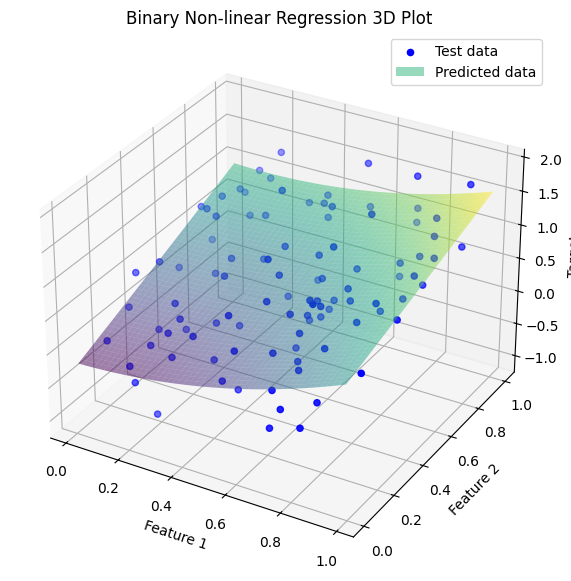

NameError: name 'mean_squared_error' is not defined

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

np.random.seed(0)
X = np.random.rand(100, 2) # 2 features
true_func = lambda x: x[:, 0] ** 2 + x[:, 1] ** 2
y = true_func(X) + np.random.randn(100) * 0.5

model = make_pipeline(PolynomialFeatures(2), LinearRegression())
model.fit(X, y)

x1 = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
x2 = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
x1, x2 = np.meshgrid(x1, x2)
X_grid = np.c_[x1.ravel(), x2.ravel()]
y_grid_pred = model.predict(X_grid)
y_grid_pred = y_grid_pred.reshape(x1.shape)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], y, color='blue', label='Test data')
ax.plot_surface(x1, x2, y_grid_pred, cmap='viridis', alpha=0.5, label='Predicted data')

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Target')
ax.set_title('Binary Non-linear Regression 3D Plot')
ax.legend()
plt.show()

print(f'Mean squared error: {mean_squared_error(y, model.predict(X))}')
print(f'R2 score: {r2_score(y, model.predict(X))}')
print(f'Intercept: {model.named_steps["linearregression"].intercept_}')
print(f'Coefficients: {model.named_steps["linearregression"].coef_}')

## Logistic Regression with sklearn

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

# Binary classification
X = X[y != 2]
y = y[y != 2]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(X_test)
print(y_pred)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

class_report = classification_report(y_test, y_pred)
print(class_report)

[[6.  2.7 5.1 1.6]
 [5.5 2.3 4.  1.3]
 [5.9 3.2 4.8 1.8]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.9 0.4]
 [5.1 3.4 1.5 0.2]
 [4.6 3.6 1.  0.2]
 [5.5 2.4 3.8 1.1]
 [5.4 3.7 1.5 0.2]
 [5.1 3.5 1.4 0.2]
 [5.7 3.8 1.7 0.3]
 [4.8 3.1 1.6 0.2]
 [6.1 2.8 4.7 1.2]
 [5.5 4.2 1.4 0.2]
 [5.5 2.6 4.4 1.2]
 [5.  3.6 1.4 0.2]
 [6.8 2.8 4.8 1.4]
 [6.7 3.  5.  1.7]
 [4.8 3.  1.4 0.1]
 [5.4 3.4 1.5 0.4]
 [5.7 2.8 4.5 1.3]
 [5.6 3.  4.1 1.3]
 [5.  3.4 1.6 0.4]
 [4.4 3.2 1.3 0.2]
 [5.6 2.5 3.9 1.1]
 [5.7 4.4 1.5 0.4]
 [5.  3.5 1.3 0.3]
 [5.7 2.9 4.2 1.3]
 [4.9 3.1 1.5 0.1]
 [6.3 2.5 4.9 1.5]]
[1 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 0 1 0 0 1 0 1]
Accuracy: 1.0
[[17  0]
 [ 0 13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

